In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#load the model

In [26]:
test_set= tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/archive (12)/test',
                                                          labels= 'inferred' ,#generated from directory structure
                                                          label_mode='categorical',
                                                          class_names= None,
                                                          color_mode= 'rgb',
                                                          batch_size= 32,
                                                          image_size= (64, 64),
                                                          shuffle= True,
                                                          seed=None,
                                                          validation_split=None,
                                                          subset= None,
                                                           interpolation= 'bilinear', #used to resize the image
                                                          follow_links=False,
                                                          crop_to_aspect_ratio= False)

Found 359 files belonging to 36 classes.


In [27]:
cnn= tf.keras.models.load_model("//content/drive/MyDrive/trained_model.h5")

performing prediction on single image

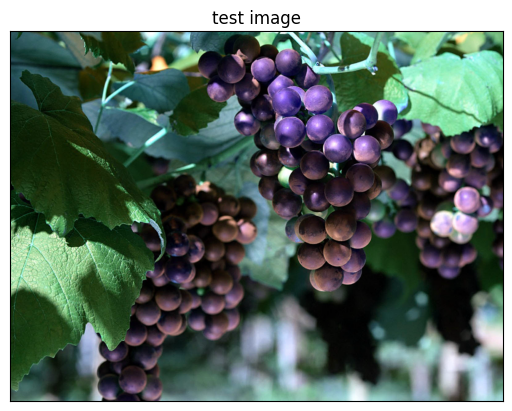

In [28]:
import cv2
img_path= ('/content/drive/MyDrive/archive (12)/test/grapes/Image_10.jpg')
img= cv2.imread(img_path)
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

testing the model

In [29]:
image= tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))


In [30]:
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr]) #converting single image to batch


In [31]:
predictions= cnn.predict(input_arr)

1/1 [==============================] - 0s 71ms/step


In [32]:
print(predictions)

[[0.0000000e+00 0.0000000e+00 1.2656321e-32 2.3857863e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.0462766e-34 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.4613552e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.8187738e-35 0.0000000e+00 0.0000000e+00 1.9064339e-35 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]


In [33]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [34]:
result_index= np.where(predictions[0]==max(predictions[0]))
print(result_index[0][0])

14


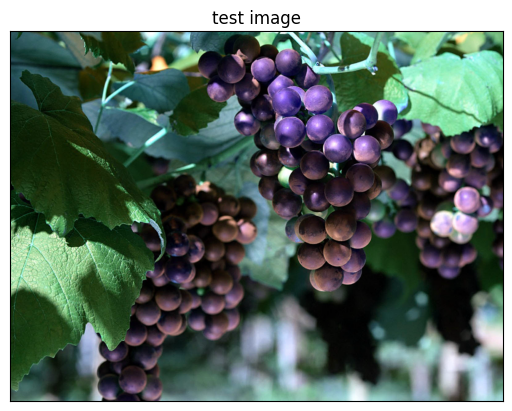

In [35]:
#display image
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
print('it is a  {}'.format(test_set.class_names[result_index[0][0]]))

it is a  grapes
